In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import time
import lsm
import monte
import fdm

In [2]:
#params of market
S0 = 125
K = 100
r = 0.02
sigma = 0.3
T = 2

In [3]:
# calc by analytic formula
true_price = monte.analytic_BS(sigma, r, K, T, S0)
print(true_price)

36.416418504420065


In [4]:
#calc by monte
M = 10 ** 6
N = 100
npr.seed(0)

start_time = time.time()

monte_price = monte.montecalro(sigma, r, K, T, S0, M, N)

end_time = time.time()
elapsed_time = end_time - start_time
hours_monte, rem = divmod(elapsed_time, 3600)
minutes_monte, seconds_monte = divmod(rem, 60)

In [5]:
#calc by lsm
M = 10 ** 6
N = 100
npr.seed(0)

start_time = time.time()

lsm_price = lsm.least_square_monte(sigma, r, K, T, S0, M, N)

end_time = time.time()
elapsed_time = end_time - start_time
hours_lsm, rem = divmod(elapsed_time, 3600)
minutes_lsm, seconds_lsm = divmod(rem, 60)

In [6]:
#calc by fdm
N = 5000
x = 10

start_time = time.time()

fdm_price = fdm.implicit_fdm(sigma, r, K, T, S0, N, x)

end_time = time.time()
elapsed_time = end_time - start_time
hours_fdm, rem = divmod(elapsed_time, 3600)
minutes_fdm, seconds_fdm = divmod(rem, 60)

In [7]:
print("montecalro")
print(f"calc time : {int(hours_monte)}h {int(minutes_monte)}m {seconds_monte:.2f}s")
print(f"price : {monte_price}, error : {abs(true_price - monte_price)}")

print("least square montecalro")
print(f"calc time : {int(hours_lsm)}h {int(minutes_lsm)}m {seconds_lsm:.2f}s")
print(f"price : {lsm_price}, error : {abs(true_price - lsm_price)}")

print("finite differential method (implicit method)")
print(f"calc time : {int(hours_fdm)}h {int(minutes_fdm)}m {seconds_fdm:.2f}s")
print(f"price : {fdm_price}, error : {abs(true_price - fdm_price)}")

montecalro
calc time : 0h 1m 32.01s
price : 36.49051830009902, error : 0.0740997956789542
least square montecalro
calc time : 0h 1m 48.66s
price : 36.73605318676405, error : 0.3196346823439882
finite differential method (implicit method)
calc time : 0h 0m 24.92s
price : 36.41485357209669, error : 0.001564932323375956


In [8]:
#for monte params to research converges
M = 10**6
N_list = np.array([2, 5, 10, 25, 50, 100])

sim_price = np.zeros(len(N_list))
true_price = monte.analytic_BS(sigma, r, K, T, S0)
errors = np.zeros(len(N_list))

In [9]:
npr.seed(100)
for n in range(len(N_list)):
    sim_price[n] = monte.montecalro(sigma, r, K, T, S0, M, N_list[n])
    errors[n] = abs(true_price - sim_price[n])

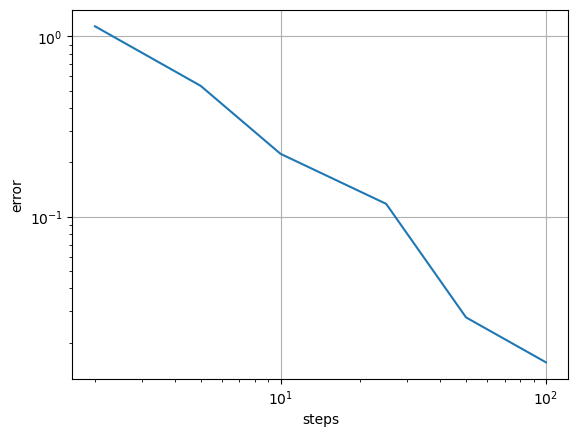

In [10]:
fig, ax = plt.subplots()
ax.plot(N_list, errors)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("steps")
ax.set_ylabel("error")
ax.grid(True)
pass